#Python применение продвинутых методов

##Домашнее задание:

##Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.
##Mobile Games AB Testing with Cookie Cats



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [2]:
df = pd.read_excel('результаты А_B.xlsx')

In [3]:
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
5,540,gate_40,187,1,1
6,1066,gate_30,0,0,0
7,1444,gate_40,2,0,0
8,1574,gate_40,108,1,1
9,1587,gate_40,153,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [8]:
df.userid.nunique()

90189

In [5]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [7]:
df.version.value_counts()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

In [9]:
df_group_A = df.query('version=="gate_30"')
df_group_B = df.query('version=="gate_40"')

In [10]:
df_group_A.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,4.470000e+04,44700.000000,44700.000000,44700.000000
mean,4.987564e+06,52.456264,0.448188,0.190201
std,2.881026e+06,256.716423,0.497314,0.392464
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.505469e+06,5.000000,0.000000,0.000000
50%,4.983631e+06,17.000000,0.000000,0.000000
75%,7.481497e+06,50.000000,1.000000,0.000000
max,9.999710e+06,49854.000000,1.000000,1.000000


In [11]:
df_group_B.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,4.548900e+04,45489.000000,45489.000000,45489.000000
mean,5.009073e+06,51.298776,0.442283,0.182000
std,2.885496e+06,103.294416,0.496663,0.385849
min,3.770000e+02,0.000000,0.000000,0.000000
25%,2.517171e+06,5.000000,0.000000,0.000000
50%,5.007329e+06,16.000000,0.000000,0.000000
75%,7.510762e+06,52.000000,1.000000,0.000000
max,9.999861e+06,2640.000000,1.000000,1.000000


In [13]:
# Retention на 1-й и 7-й день
retention_1_A = df_group_A['retention_1'].mean()
retention_1_B = df_group_B['retention_1'].mean()

retention_7_A = df_group_A['retention_7'].mean()
retention_7_B = df_group_B['retention_7'].mean()

print(f'Retention на 1-й день: Group A (gate_30) = {retention_1_A:.4f}, Group B (gate_40) = {retention_1_B:.4f}')
print(f'Retention на 7-й день: Group A (gate_30) = {retention_7_A:.4f}, Group B (gate_40) = {retention_7_B:.4f}')

Retention на 1-й день: Group A (gate_30) = 0.4482, Group B (gate_40) = 0.4423
Retention на 7-й день: Group A (gate_30) = 0.1902, Group B (gate_40) = 0.1820


In [15]:
# Тест на равенство средних
t_stat, p_value = stats.ttest_ind(df_group_A['sum_gamerounds'], df_group_B['sum_gamerounds'])
print(f"t-stat: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

t-stat: 0.8910
p-value: 0.3729


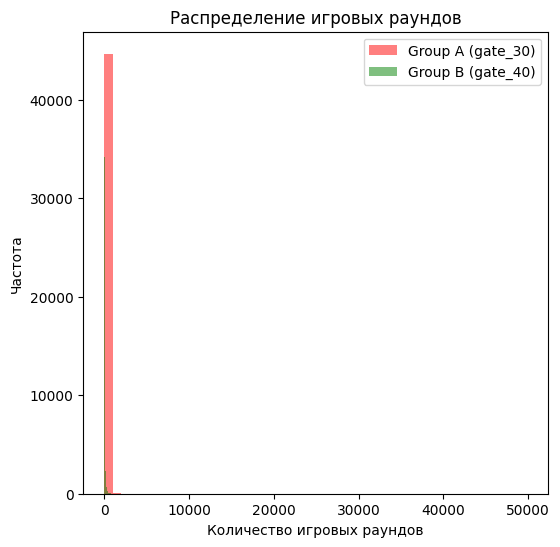

In [29]:
# График распределения игрового времени
plt.figure(figsize=(6, 6))
plt.hist(df_group_A['sum_gamerounds'], color='r', bins=50, alpha = 0.5, label='Group A (gate_30)')
plt.hist(df_group_B['sum_gamerounds'], color='g', bins=50, alpha = 0.5, label='Group B (gate_40)')
plt.legend()
plt.title('Распределение игровых раундов')
plt.xlabel('Количество игровых раундов')
plt.ylabel('Частота')
plt.show()

**Подведение результатов:**

**Результаты по удержанию:**
- Retention на 1-й день: Группа A (gate_30) = 44.82%, Группа B (gate_40) = 44.23%. Разница незначительная.
- Retention на 7-й день: Группа A (gate_30) = 19.02%, Группа B (gate_40) = 18.20%. Разница также незначительная.

**Игровые раунды:**
- Среднее количество игровых раундов для группы A немного выше, чем для группы B.
- Статистический тест (t-stat = 0.8910, p-value = 0.3729) показывает, что разница не является статистически значимой.


Удержание пользователей и количество игровых раундов для обеих групп схожи, без значительных различий.
<br>На основе текущих данных нет достаточных оснований для утверждения, что одно из изменений (gate_30 или gate_40) значительно лучше другого.

**Рекомендации:**
- Продолжить эксперимент для получения более значимых данных.
- Проводить дополнительные A/B тесты с другими изменениями, чтобы найти оптимальное решение для улучшения удержания пользователей и вовлеченности.